# Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

Metric Submissions are evaluated on Mean-Squared-Error (MSE). Submission File Format The file should contain a header and have the following format:

Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221

# Step 1:- Read_Data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
train=pd.read_csv("C:/Users/LENOVO/Desktop/ML/Housing/training_set.csv")
test=pd.read_csv("C:/Users/LENOVO/Desktop/ML/Housing/testing_set.csv")

# Step 2:- Missing Data Treatment

In [3]:
train.isna().sum().head(50)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [4]:
train.Alley = train.Alley.fillna("No alley access")
train.BsmtQual = train.BsmtQual.fillna("No Basement")
train.BsmtCond = train.BsmtCond.fillna("No Basement")
train.BsmtExposure = train.BsmtExposure.fillna("No Basement")
train.BsmtFinType1 = train.BsmtFinType1.fillna("No Basement")
train.BsmtFinType2 = train.BsmtFinType2.fillna("No Basement")
train.FireplaceQu = train.FireplaceQu.fillna("No Fireplace")
train.GarageType = train.GarageType.fillna("No Garage")
train.GarageFinish = train.GarageFinish.fillna("No Garage")
train.GarageQual = train.GarageQual.fillna("No Garage")
train.GarageCond = train.GarageCond.fillna("No Garage")
train.PoolQC = train.PoolQC.fillna("No Pool")
train.Fence = train.Fence.fillna("No Fence")
train.MiscFeature = train.MiscFeature.fillna("None")

from PM4 import replacer
replacer(train)

In [5]:
test.Alley = test.Alley.fillna("No alley access")
test.BsmtQual = test.BsmtQual.fillna("No Basement")
test.BsmtCond = test.BsmtCond.fillna("No Basement")
test.BsmtExposure = test.BsmtExposure.fillna("No Basement")
test.BsmtFinType1 = test.BsmtFinType1.fillna("No Basement")
test.BsmtFinType2 = test.BsmtFinType2.fillna("No Basement")
test.FireplaceQu = test.FireplaceQu.fillna("No Fireplace")
test.GarageType = test.GarageType.fillna("No Garage")
test.GarageFinish = test.GarageFinish.fillna("No Garage")
test.GarageQual = test.GarageQual.fillna("No Garage")
test.GarageCond = test.GarageCond.fillna("No Garage")
test.PoolQC = test.PoolQC.fillna("No Pool")
test.Fence = test.Fence.fillna("No Fence")
test.MiscFeature = test.MiscFeature.fillna("None")

from PM4 import replacer
replacer(test)

In [6]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500


# Step 3:- EDA(Exploratory Data Analysis)

In [7]:
Y=train[["SalePrice"]]
X=train.drop(labels=["SalePrice","Id"],axis=1)

from PM8 import ANOVA,chisquare
train.corr()[["SalePrice"]].sort_values(by="SalePrice")


,SalePrice
KitchenAbvGr,-0.135907
EnclosedPorch,-0.128578
MSSubClass,-0.084284
OverallCond,-0.077856
YrSold,-0.028923
LowQualFinSF,-0.025606
Id,-0.021917
MiscVal,-0.021190
BsmtHalfBath,-0.016844
BsmtFinSF2,-0.011378


In [8]:
for i in train.columns:
    if(train[i].dtype=="object"):
        print("SalePrice vs",i,":---->",ANOVA(train,i,"SalePrice"))

SalePrice vs MSZoning :----> 0.0
SalePrice vs Street :----> 0.117
SalePrice vs Alley :----> 0.0
SalePrice vs LotShape :----> 0.0
SalePrice vs LandContour :----> 0.0
SalePrice vs Utilities :----> 0.585
SalePrice vs LotConfig :----> 0.0
SalePrice vs LandSlope :----> 0.141
SalePrice vs Neighborhood :----> 0.0
SalePrice vs Condition1 :----> 0.0
SalePrice vs Condition2 :----> 0.043
SalePrice vs BldgType :----> 0.0
SalePrice vs HouseStyle :----> 0.0
SalePrice vs RoofStyle :----> 0.0
SalePrice vs RoofMatl :----> 0.0
SalePrice vs Exterior1st :----> 0.0
SalePrice vs Exterior2nd :----> 0.0
SalePrice vs MasVnrType :----> 0.0
SalePrice vs ExterQual :----> 0.0
SalePrice vs ExterCond :----> 0.0
SalePrice vs Foundation :----> 0.0
SalePrice vs BsmtQual :----> 0.0
SalePrice vs BsmtCond :----> 0.0
SalePrice vs BsmtExposure :----> 0.0
SalePrice vs BsmtFinType1 :----> 0.0
SalePrice vs BsmtFinType2 :----> 0.0
SalePrice vs Heating :----> 0.001
SalePrice vs HeatingQC :----> 0.0
SalePrice vs CentralAir :---->

In [9]:
X=X.drop(labels=["Utilities","Street"],axis=1)

# Step 4:- Preprocessing

In [10]:
from PM8 import preprocessing
Xnew=preprocessing(X)

# Step 5:- Split

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Step 6:- Model OLS(Ordinary Least Square)

In [12]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()

prev_rsq = model.rsquared_adj
col_to_drop = model.pvalues.sort_values().tail(1).index[0]
Xnew = Xnew.drop(labels=col_to_drop,axis=1)
xtrain,xval,ytrain,yval = train_test_split(Xnew,Y,test_size=0.2,random_state=31)
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
curr_rsq = model.rsquared_adj
print("Previous:",round(prev_rsq,5),"\tCurrent:",round(curr_rsq,5),"\t",col_to_drop)

Previous: 0.93323 	Current: 0.93323 	 ExterCond_Ex


# Step 7:- Check for Overfitting

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xval)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(yval,pred_ts)

In [14]:
tr_err

12419.276220034246

In [15]:
ts_err

980747121234.5085

# Step 8:- Regularize

In [16]:
from sklearn.linear_model import Ridge

def reg(mo):
    model = mo.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xval)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,pred_tr)
    ts_err = mean_absolute_error(yval,pred_ts)
    print("Training Error:",tr_err)
    print("Validation Error:",ts_err)
    print("-------------------------")
    return ts_err

In [17]:
W = []
e = 0.0
for i in range(0,1000):
    W.append(round(e,3))
    e = e + 0.001
err = []
for i in W:
    rr = Ridge(alpha=i)
    print("----------","Alpha",i,"---------")
    trerr = reg(rr)
    err.append(trerr)

---------- Alpha 0.0 ---------
Training Error: 13986.540239726028
Validation Error: 2.731348388877186e+16
-------------------------
---------- Alpha 0.001 ---------
Training Error: 12418.342264258925
Validation Error: 18287.557085207503
-------------------------
---------- Alpha 0.002 ---------
Training Error: 12418.665614386418
Validation Error: 18286.079813741217
-------------------------
---------- Alpha 0.003 ---------
Training Error: 12419.032364611905
Validation Error: 18284.607645877946
-------------------------
---------- Alpha 0.004 ---------
Training Error: 12419.393171924788
Validation Error: 18283.140507995784
-------------------------
---------- Alpha 0.005 ---------
Training Error: 12419.740021264435
Validation Error: 18281.678309439343
-------------------------
---------- Alpha 0.006 ---------
Training Error: 12420.175153345961
Validation Error: 18280.220948291724
-------------------------
---------- Alpha 0.007 ---------
Training Error: 12420.595850791
Validation Error:

In [18]:
err

[2.731348388877186e+16,
 18287.557085207503,
 18286.079813741217,
 18284.607645877946,
 18283.140507995784,
 18281.678309439343,
 18280.220948291724,
 18278.768315722835,
 18277.320299257648,
 18275.876785219934,
 18274.437660534204,
 18273.00281404945,
 18271.953745759212,
 18270.935561565773,
 18269.917119059483,
 18268.898483321525,
 18267.879710715846,
 18266.860850370063,
 18265.841945404045,
 18264.823033945355,
 18263.80414996936,
 18262.78532399807,
 18261.766583679288,
 18260.74795426692,
 18259.72945902256,
 18258.711119546515,
 18257.93879846994,
 18257.183756094724,
 18256.426858935294,
 18255.804954159725,
 18255.302512921546,
 18254.796355393348,
 18254.2865747526,
 18253.77326030288,
 18253.25649777608,
 18252.736369604307,
 18252.21295516046,
 18251.68633097551,
 18251.156570933228,
 18250.623746443955,
 18250.136138532955,
 18249.69149460442,
 18249.2432779256,
 18248.791565687225,
 18248.3364327222,
 18247.87795163329,
 18247.548935211995,
 18247.292995741525,
 18247.

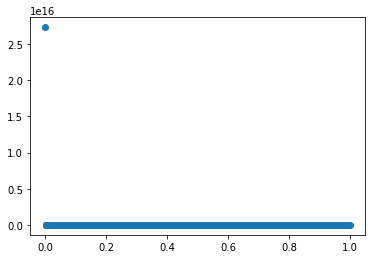

In [19]:
import matplotlib.pyplot as plt
plt.scatter(W,err)

rr = Ridge(alpha=0.077)
model = rr.fit(Xnew,Y)

xtest = preprocessing(test)

# Step 9:- Train the selected regularized model

In [20]:
rr = Ridge(alpha=0.077)
model = rr.fit(Xnew,Y)
Xnew.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=297)

# Step 10:- Prepare Test Data

In [21]:
xtest = preprocessing(test)

In [22]:
#xtest[Xnew.columns]
# commom cloumns for prediction

In [23]:
r=['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC']

# Step 11:- Final Output

In [24]:
for i in r:
    xtest[i]=0
xfinal = xtest[Xnew.columns]
pred_final = model.predict(xfinal)
final_sub = test[["Id"]]
final_sub["SalePrice"]=pred_final
final_sub.to_csv("C:/Users/LENOVO/Desktop/housing_submission.csv",index=None)

# Conclusion:- 
The Saleprice of Houses is sucessfully predicted and the output in form of Id and SalePrice has been submitted to housing_submission.csv

# ---------------------------------------------------------------------------------------------------------------